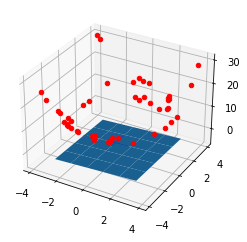

In [ ]:
#importing modules
import numpy as pyn
from matplotlib import pyplot as pyplt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
from IPython import display
import time

#input array declaration
x1_list = []
x2_list = []
x3_list = []
t_list = []

learning_rate = 0.2



#recording weights to w1,w2,w3,biased
w1 = random.uniform(-2.0,2)
w2 = random.uniform(-2.0,2)
w3 = random.uniform(-2.0,2)
biased = random.uniform(-2.0,2)

#creating a error list
error_appended=[]

#values for first data set
for i in range(50):
    x1 = random.uniform(-0.5,0.5)
    x2 = random.uniform(-0.5,0.5)
    x1_list.append(x1)
    x2_list.append(x2)
    t_list.append(0)
    
#values for second dataset first part
    
for i in range(25):    
    r = random.uniform(9,16)
    x_1 = random.uniform(-4,4)
    radius = r-pow(x_1,2)
    if(radius>0):
        x_2=math.sqrt(radius)
        
    x1_list.append(x_1)
    x2_list.append(x_2)
    t_list.append(1)

#values for second dataset second part
    
for i in range(25):   
    r = random.uniform(9,16)
    x_1 = random.uniform(-4,4)
    radius = r-pow(x_1,2)
    if(radius>0):
        x_2_temp = math.sqrt(radius)
        #inorder to take x_2 in negative values 
        x_2 = -(x_2_temp)
    x1_list.append(x_1)
    x2_list.append(x_2)
    # Taking Target as 1
    t_list.append(1)

#Taking x3 values in a list  x3=(x1^2)*(x2^2)  
for i in range(100):
    x3_list.append((x1_list[i]**2) + (x2_list[i]**2))

#while stmt to loop the change in weights in neuron equation(u)    
while True:
    tot_error = 0

    for i in range(100): 
        #Neuron equation
        u = (x1_list[i]*w1) + (x2_list[i]*w2) + x3_list[i]*w3 + biased
        
        #sigmoid equation
        y = 1/( 1 + pyn.exp(-u))
        
        #error quation
        E = pow((t_list[i]-y),2)
        
        #change in weights for better output and to reduce error
        dw1 = learning_rate*(x1_list[i]*(t_list[i]-y))*(y*(1-y))
        dw2 = learning_rate*(x2_list[i]*(t_list[i]-y))*(y*(1-y))
        dw3 = learning_rate*(x3_list[i]*(t_list[i]-y))*(y*(1-y))
        d_biased = learning_rate*(t_list[i]-y)*(y*(1-y))*1
        tot_error = tot_error + E

        #change of weights to minimize the error
        w1 = w1 + dw1
        w2 = w2 + dw2
        w3 = w3 + dw3
        biased = biased + d_biased

    error_appended.append(tot_error)
    
    #break condition to exit if the total error is lessthan 0.01   
    if(tot_error < 0.01):
        break;
        
#To plot a 3d figure
    fig = pyplt.figure()
    ax = pyplt.axes(projection="3d")
    
#Ploting co-ordinates
    for i in range(100):
        if t_list[i]>=1:
            ax.scatter(x1_list[i],x2_list[i],x3_list[i], marker="o", c="r")
        else:
            ax.scatter(x1_list[i],x2_list[i],x3_list[i], marker="s", c="b")

    x = pyn.linspace(-3,3,6)
    y = pyn.linspace(-3,3,6)
    x,y = pyn.meshgrid(x,y)
    z= (-w1*x-(w2*y)-biased)/w3
    surf = ax.plot_surface(x,y,z)    
    display.display(pyplt.gcf()) 
    display.clear_output(wait = True)
    time.sleep(0.0000001)